In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('parsed_data.csv')

1. Выведите первые 5 строк датасета. (0.25). Сколько в нём строк и столбцов (0.25)?

In [3]:
df.head()

,name,author,link,rating,rating_count,review_count,pages_count,price,text_reviews,age,year
0,Изучаем DDD – предметно-ориентированное проект...,['Влад Хононов'],https://www.litres.ru/book/vlad-hononov/izucha...,0.0,0,1,319.0,549.0,"['Эта книга из той лиги, в которой я пока не с...",0+,2022.0
1,Высоконагруженные приложения. Программирование...,['Мартин Клеппман'],https://www.litres.ru/book/martin-kleppman-173...,4.0,51,11,640.0,799.0,"['Не могу что-либо про перевод сказать, читал ...",16+,2017.0
2,System Design. Подготовка к сложному интервью,['Алекс Сюй'],https://www.litres.ru/book/aleks-suy/system-de...,3.6,17,9,304.0,699.0,['Добротная книга по разработке архитектуры пр...,16+,2020.0
3,Начинаем программировать на Python,['Тони Гэддис'],https://www.litres.ru/book/toni-geddis-3249116...,5.0,16,6,875.0,599.0,['Шикарная книга! Начал изучать Python самосто...,12+,2021.0
4,Нейросети начало,['Джейд Картер'],https://www.litres.ru/book/dzheyd-karter/neyro...,4.9,440,37,102.0,690.0,['Книга отличная. Давно хотела понять как все ...,12+,2023.0


In [4]:
df.shape

(960, 11)

2. Есть ли в датасете пропуски? (0.5)

In [5]:
# определенно есть, парсил сам и не идеально
df.isna().sum()

name             0
author           0
link             0
rating           0
rating_count     0
review_count     0
pages_count     48
price           24
text_reviews     0
age              0
year            46
dtype: int64

In [6]:
# ничего лучше медианы не приходит в голову
df.pages_count = df.pages_count.fillna(df.pages_count.median())
df.year = df.year.fillna(df.year.median())
df.price = df.price.fillna(df.price.median())

3. Проверьте типы данных. Если это необходимо, приведите к типам int и float те столбцы, с которыми понадобится работать как с числами. (1).

In [7]:
df.dtypes

name             object
author           object
link             object
rating          float64
rating_count      int64
review_count      int64
pages_count     float64
price           float64
text_reviews     object
age              object
year            float64
dtype: object

In [8]:
df.pages_count = df.pages_count.astype(int)
df.price = df.price.astype(int)
df.year = df.year.astype(int)

4. Выведите описательные статистики переменных. Ответьте на следующие вопросы:
- Какая медианная цена книги в вашем датасете? (1)
- Какое возрастное ограничение встречается чаще всего? (1)
- Какое среднее число отзывов в книге? (1)
- Сколько книг имеют оценку ниже 4.25? (1)
- В каком году было написано больше всего книг из датасета? (1)

In [9]:
df.price.median()

np.float64(349.0)

In [10]:
df.age.mode()

0    0+
Name: age, dtype: object

In [11]:
df.review_count.mean()

np.float64(2.31875)

In [12]:
# абсолютное число и доля от всех
(df.rating < 4.25).sum(), (df.rating < 4.25).mean()

(np.int64(551), np.float64(0.5739583333333333))

In [13]:
df.year.mode()

0    2023
Name: year, dtype: int64

6. Создайте новое поле is_popular. Значение равно 1, если рейтинг книги не менее 4.6 и при этом у нее не менее 5 отзывов, и 0 в остальных случаях. (1)

In [14]:
df['is_popular'] = ((df.rating >= 4.6) & (df.review_count >= 5)).astype(int)

7. Как отличается среднее число страниц среди популярных и непопулярных книг? (2)

In [15]:
# на 82 страницы больше у популярных
df[df.is_popular == 1].pages_count.mean() - df[df.is_popular == 0].pages_count.mean()

np.float64(82.09437617771175)

In [16]:
# на 33 процента больше у популярных
df[df.is_popular == 1].pages_count.mean() / df[df.is_popular == 0].pages_count.mean()

np.float64(1.3282132195302334)

8. Выведите топ-10 книг по числу отзывов. (2).

In [17]:
df.sort_values('review_count', ascending=False).head(10)

,name,author,link,rating,rating_count,review_count,pages_count,price,text_reviews,age,year,is_popular
456,Оптимизация в Python,['Джейд Картер'],https://www.litres.ru/book/dzheyd-karter/optim...,5.0,306,41,252,690,['Много интересных путей оптимизации показано....,12+,2023,1
4,Нейросети начало,['Джейд Картер'],https://www.litres.ru/book/dzheyd-karter/neyro...,4.9,440,37,102,690,['Книга отличная. Давно хотела понять как все ...,12+,2023,1
208,Психбольница в руках пациентов. Алан Купер об ...,['Алан Купер'],https://www.litres.ru/book/alan-kuper/psihboln...,4.0,64,30,502,599,"['хорошая книжка, но уже немного подотстает от...",16+,2004,0
125,Теоретический минимум по Computer Science. Все...,['Владстон Феррейра Фило'],https://www.litres.ru/book/vladston-ferreyra-f...,3.9,94,28,224,599,['Прекрасная книга. Рекомендовал и старшим шко...,16+,2017,0
350,Идеальный программист. Как стать профессионало...,['Роберт Мартин'],https://www.litres.ru/book/robert-s-martin/ide...,4.6,191,27,247,449,['Книга – истинный кладезь премудрости для опт...,12+,2011,1
496,"Говорят, в IT много платят. Как построить успе...",['Елена Правдина'],https://www.litres.ru/book/elena-pravdina-2543...,4.3,66,27,291,379,['Книга написана профессиональным специалистом...,16+,2021,0
434,Базовые знания тестировщика веб-приложений,"['Марина Охапкина', 'Вадим Охапкин']",https://www.litres.ru/book/vadim-ohapkin/bazov...,4.5,237,25,67,349,"['Из любопытства просмотрела книгу и, как опыт...",12+,2015,0
151,#Сам себе программист. Как научиться программи...,['Кори Альтхофф'],https://www.litres.ru/book/kori-althoff/sam-se...,4.2,128,25,210,299,"['Отличная книга чтобы начать программировать,...",12+,2017,0
231,Сделай видеоигру один и не свихнись,['Слава Грис'],https://www.litres.ru/audiobook/slava-gris/sde...,4.9,73,24,220,529,"['Начну со слов ""Слава - моё почтение"".', 'Дей...",12+,2023,1
43,Сделай видеоигру один и не свихнись,['Слава Грис'],https://www.litres.ru/book/slava-gris/sdelay-v...,4.8,86,24,242,499,['Отличная книга для инди-разработчиков! Must ...,12+,2023,1


9. Найдите среднюю длину отзыва (в символах). (2)

In [18]:
type(df.text_reviews.iloc[0])

str

In [19]:
df.text_reviews = df.text_reviews.apply(eval)

In [20]:
df.text_reviews.explode().fillna('').apply(len).mean()

np.float64(188.21044849679646)

10. Постройте таблицу корреляций числовых переменных. (1) Прокомментируйте результаты. (1)

In [21]:
df.loc[:, df.dtypes[df.dtypes != object].index].corr()

,rating,rating_count,review_count,pages_count,price,year,is_popular
rating,1.000000,0.249415,0.333485,0.438435,0.387656,0.294941,0.187601
rating_count,0.249415,1.000000,0.688348,0.095068,0.195649,0.130965,0.566682
review_count,0.333485,0.688348,1.000000,0.220526,0.247210,0.083654,0.427222
pages_count,0.438435,0.095068,0.220526,1.000000,0.577380,0.169515,0.071384
price,0.387656,0.195649,0.247210,0.577380,1.000000,0.414169,0.136410
year,0.294941,0.130965,0.083654,0.169515,0.414169,1.000000,0.148998
is_popular,0.187601,0.566682,0.427222,0.071384,0.136410,0.148998,1.000000


- кол-во отзывов и кол-во оценок (0.69). логично
- популярность и кол-во оценок, кол-во отзывов (0.57 и 0.43). интуитивно кажется логичным: люди больше взаимодействуют с популярными книгами
- цена и кол-во страниц (0.58). натянутая гипотеза: длиннее книга, дороже печатать, значит, надо и продать дороже (хотя книги электронные, больше байтов по сети передавать что ли..)
- рейтинг и кол-во оценок, отзывов, популярность (0.24, 0.33, 0.19). предположу, что популярное в среднем лучше оценивают 

11. Постройте диаграмму рассеяния (scatterplot) количества страниц и количества отзывов. Не забудьте подписать график и оси. (1) Прокомментируйте полученные результаты. (1)

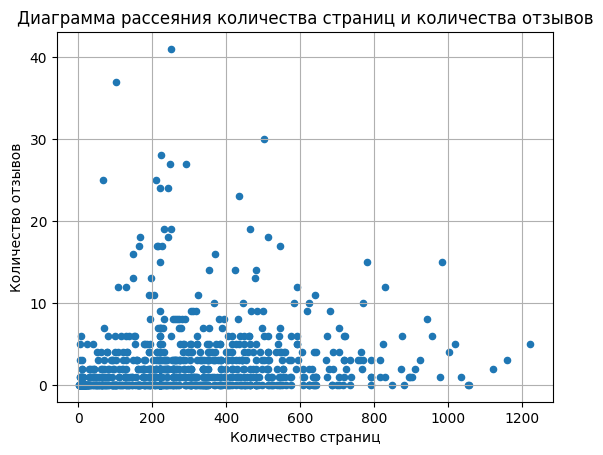

In [22]:
df.plot.scatter('pages_count', 'review_count')
plt.title('Диаграмма рассеяния количества страниц и количества отзывов')
plt.xlabel('Количество страниц')
plt.ylabel('Количество отзывов')
plt.grid()
plt.show()

- большинство книг имеют небольшое количество отзывов, независимо от количества страниц
- есть несколько книг с большим количеством страниц, но они не имеют значительного количества отзывов
- некоторые книги, несмотря на относительно небольшое количество страниц, получили большее количество отзывов

12. Постройте линейный график: по оси Х год, по оси Y количество книг. (1) Прокомментируйте. (1)

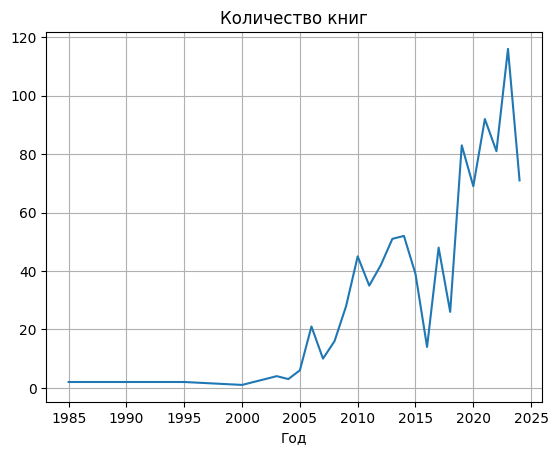

In [23]:
df.groupby('year').size().plot()
plt.grid()
plt.title('Количество книг')
plt.xlabel('Год')
plt.show()

- виден резкий рост после ~2019 года
- после пика в 2021 наблюдается снижение
- книги по программированию до 1985 года в выборку не попали

13. Постройте еще любые два графика по вашему усмотрению. (2) Прокомментируйте полученные результаты. (1.5)

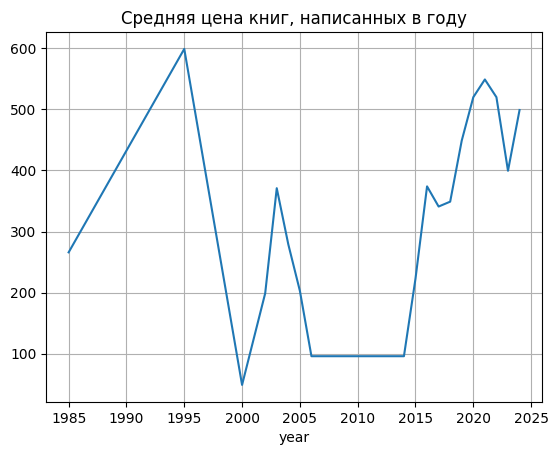

In [24]:
df.groupby('year').price.median().plot()
plt.title('Средняя цена книг, написанных в году')
plt.grid()
plt.show()

- недавно вышедшие книги обычно дороже
- книги с 2006 по 2014 (и 2000) наиболее дешевые
- 1995 году были написаны книги, которые в среднем дороже всего сейчас

In [25]:
df.author = df.author.apply(eval)

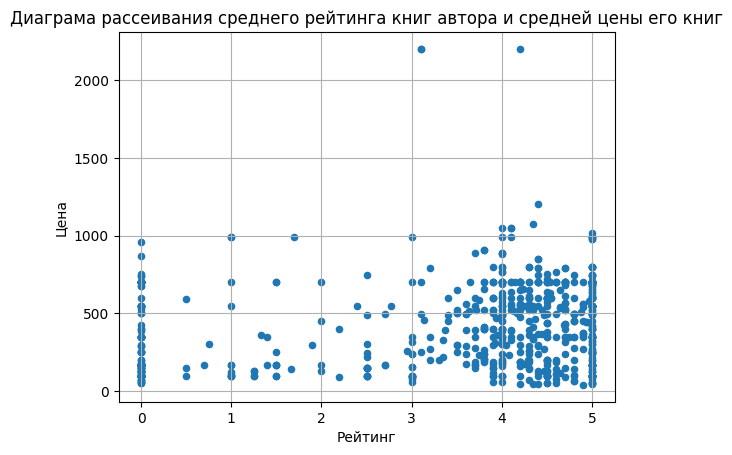

In [26]:
df.explode('author').groupby('author')[['price', 'rating']].mean().plot.scatter('rating', 'price')
plt.title('Диаграма рассеивания среднего рейтинга книг автора и средней цены его книг')
plt.xlabel('Рейтинг')
plt.ylabel('Цена')
plt.grid()
plt.show()

- нет явной взаимосвязи между рейтингом автора и ценой его книг
- есть два автора, чьи книги заметно дороже
- книги авторов чаще всего имеют оценку от 4 до 5 (либо не имеют вовсе)

14. Постройте таблицу с авторами книг с именем автора, количество книг в датасете, средней оценкой книг, средним количеством отзывов. (2).

In [27]:
agg_df = df.explode('author').groupby('author').agg({
    'author': 'size', 'rating': 'mean', 'review_count': 'mean'
}).rename({
    'author': 'books_num', 'rating': 'mean_rating', 'review_count': 'mean_review_count'
}, axis=1).reset_index()
agg_df.to_csv('author_agg_stats.csv', index=False)
agg_df.sample(5)

,author,books_num,mean_rating,mean_review_count
670,П. А. Кулагин,1,0.0,0.0
59,А. Г. Мадера,1,0.0,0.0
137,Алина Мальгинова,1,5.0,4.0
726,С. В. Федотова,1,0.0,0.0
469,Ирв Кальб,1,4.4,3.0


15. Что еще интересного можно увидеть в этом датасете? Просмотрите на данные и ответьте на какие-нибудь вопросы, на которые не ответили в предыдущим пункте. Мы никак не ограничиваем вашу фантазию! (3).